In [3]:
import pandas as pd
import seaborn as sns

In [5]:
# tips 데이터셋 로드
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]

2 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림

3 식사 인원과 성별에 따른(그룹화) 팁 비율의 평균 값을 구하고 그래프 시각화 (bar그래프)

In [11]:
tips.columns = ['총금액', '팁','성별','흡연여부', '요일','시간','인원']

In [16]:
tips['총금액'] = round(tips['총금액'], 1)
tips['팁'] = round(tips['팁'], 1)

In [29]:
tips['팁비율'] = tips['팁'] / tips['총금액']

result = tips.groupby(['인원','성별'])['팁비율'].mean()
result


인원  성별    
1   Male      0.220930
    Female    0.213229
2   Male      0.162738
    Female    0.170536
3   Male      0.147631
    Female    0.160257
4   Male      0.150170
    Female    0.132679
5   Male      0.133715
    Female    0.171141
6   Male      0.149535
    Female    0.163062
Name: 팁비율, dtype: float64

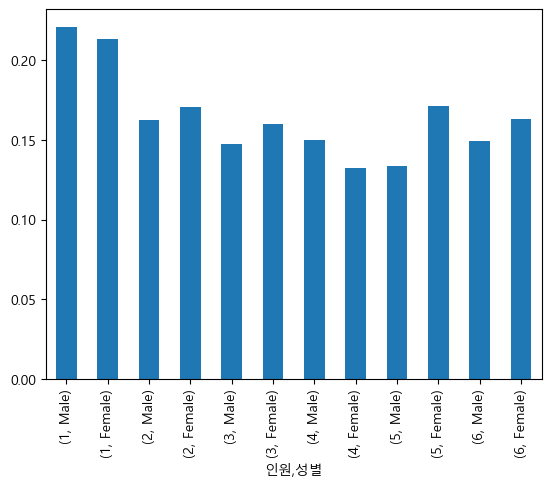

In [35]:
import matplotlib.pyplot as pt

result.plot(kind='bar')
pt.rcParams['font.family'] = 'Malgun Gothic'



In [38]:
result.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

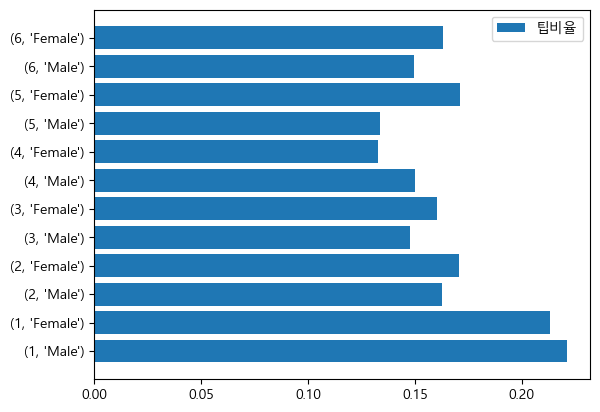

In [46]:
x = list(range(0, len(result.index),1))
y = result.values
pt.barh(x,y, label='팁비율')
pt.yticks(x, result.index)
pt.legend()
pt.show()

In [48]:
# 남자 데이터프레임
# 여자 데이터프레임으로 나눈다

male_data = pd.DataFrame()
female_data = pd.DataFrame()

for i in result.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, result.loc[i]])
    else :
        female_data = pd.concat([female_data, result.loc[i]])

TypeError: cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid

In [52]:
pivot_data = pd.pivot_table(
    tips,
    index = '인원',
    columns = '성별',
    values = ['팁비율'],
    aggfunc = 'mean'
)
pt.show(pivot_data)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().